<a href="https://colab.research.google.com/github/swathi12-nov/python/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/seattle-weather.csv')

In [ ]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
data.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [ ]:
data.shape

(1461, 6)

In [ ]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
data.info

<bound method DataFrame.info of             date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]>

In [ ]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

data['weather']=LabelEncoder().fit_transform(data['weather'])

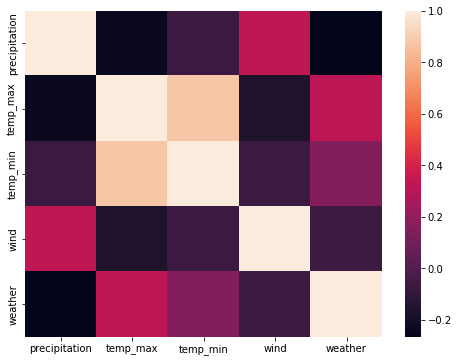

In [ ]:
fig, axes=plt.subplots(figsize=(8, 6))
sns.heatmap(data.corr(), ax=axes)

MACHINE LEARNING MODEL FOR PREDICTION

In [ ]:
from sklearn.model_selection import train_test_split
features=["precipitation", "temp_max", "temp_min", "wind"]
X=data[features]
y=data.weather
train_X, test_X, train_y, test_y = train_test_split(X, y,random_state = 0)

In [ ]:
print(train_X)

      precipitation  temp_max  temp_min  wind
1135            6.1      13.3       8.3   2.5
1214            0.0      16.1       7.2   4.7
1407            6.6      11.1       7.8   1.8
811             0.0      11.1       1.1   1.8
985             0.0      24.4      12.8   5.9
...             ...       ...       ...   ...
763             0.0       8.9       1.1   2.5
835             0.5      14.4       7.8   4.0
1216            0.0      18.3       8.9   3.7
559             0.0      26.1      11.1   3.1
684             3.0      10.6       7.2   6.0

[1095 rows x 4 columns]


In [ ]:
print(test_X)

      precipitation  temp_max  temp_min  wind
530             0.0      20.0      12.2   3.7
657             0.0      10.6       7.8   1.4
459             8.4      14.4      10.0   3.0
279             0.0      23.9       7.8   5.1
656             0.0      12.8       7.2   1.2
...             ...       ...       ...   ...
781             3.0      10.0       5.6   6.9
1391            0.0      12.8       7.2   2.6
1168           17.0      13.9       9.4   3.8
847             6.9      11.1       6.1   5.8
1425            0.0       9.4      -1.0   4.3

[366 rows x 4 columns]


In [ ]:
print(train_y)

1135    2
1214    4
1407    2
811     4
985     4
       ..
763     4
835     2
1216    4
559     4
684     2
Name: weather, Length: 1095, dtype: int64


In [ ]:
print(test_y)

530     4
657     4
459     2
279     4
656     4
       ..
781     2
1391    1
1168    2
847     2
1425    4
Name: weather, Length: 366, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

model1=DecisionTreeRegressor(random_state=1)
model1.fit(train_X, train_y)
pred1=model1.predict(test_X)
print("Mean Absolute Error: %f" %(mean_absolute_error(test_y, pred1)))

Mean Absolute Error: 0.713115


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model2=RandomForestRegressor(random_state=1)
model2.fit(train_X, train_y)
pred2=model2.predict(test_X)
print("Mean Absolute Error: %f" %(mean_absolute_error(test_y, pred2)))
    

Mean Absolute Error: 0.694026


In [ ]:
from xgboost import XGBRegressor

model3= XGBRegressor(n_estimators=100, learning_rate=0.04)
model3.fit(train_X, train_y)
pred3=model3.predict(test_X)
print("Mean Absolute Error: %f" %(mean_absolute_error(test_y, pred3)))

[09:25:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 0.679224
